In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load both data frames and get basic info of my data, data types, etc.
Lets star with the observations dataset

In [37]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [38]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


As we can see we have 3 variables, two categorical and one numerical <br>
observations variables is type int so we dont have to change that

In [41]:
observations.describe().T[['mean', 'min', 'max']]

,mean,min,max
observations,142.287904,9.0,321.0


The mean of the numbers of times each especies was observes at a park is 142 <br>
Minimun times of observation 9 <br>
Maxximun times of observations 321

In [54]:
observations[observations['observations'] == 321]

,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321


The Lycopodium tristachyum is the specie that was most observe in the data, it was seen in Yellostone National Park

In [45]:
observations[observations['observations'] == 9]

,scientific_name,park_name,observations
9418,Corydalis aurea,Bryce National Park,9


The Corydalis aurea is the specie that was leat observe in the data, it was seen in the Bryce National Park

In [66]:
observations.groupby('park_name')['observations'].sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

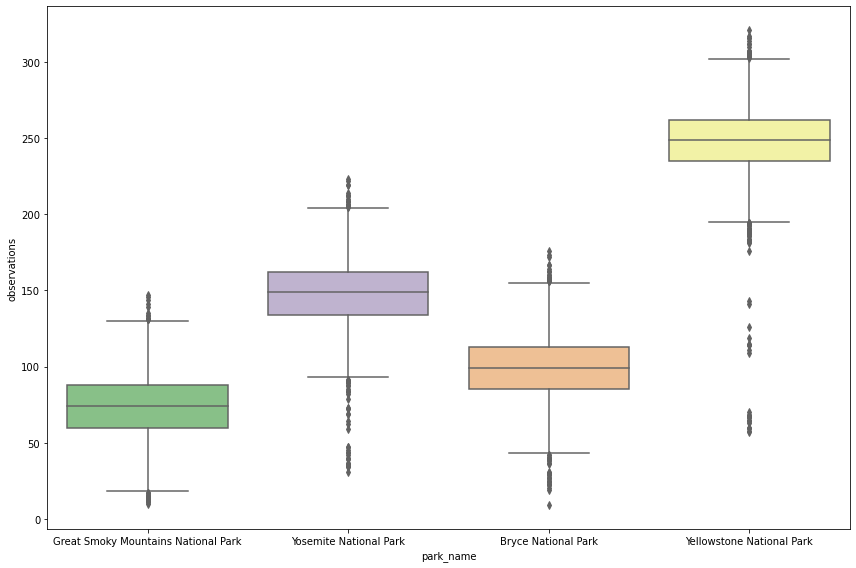

In [68]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='park_name', y='observations', data=observations, palette='Accent')

plt.tight_layout()
plt.show()

From the box plot above we can see that:
- Observations in Yellostone tend to be higher than the rest


The majority of species were seen in the Yellowstone Park, the least were seen in Great Smoky.

In [58]:
# number of observations by scientific name
number_species_obs = observations.groupby('scientific_name')['observations'].count().to_frame()
number_species_obs.head()

,observations
scientific_name,
Abies bifolia,4
Abies concolor,4
Abies fraseri,4
Abietinella abietina,4
Abronia ammophila,4


In [59]:
number_species_obs.value_counts()

observations
4               5267
8                265
12                 9
dtype: int64

#### Species data

In [5]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [11]:
species['conservation_status'].value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [61]:
species.fillna('No information', inplace=True)

In [64]:
conservationCategory = species[species['conservation_status'] != "No Information"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()\
    .fillna(0)

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,1.0,0.0,0.0,0.0
No information,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0.0,4.0,2.0,0.0,0.0,2.0


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

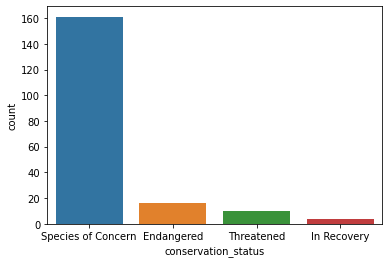

In [26]:
sns.countplot(x='conservation_status', data=species)

In [14]:
endengered = species[species['conservation_status'] == 'Endangered']
endengered.head(2)

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


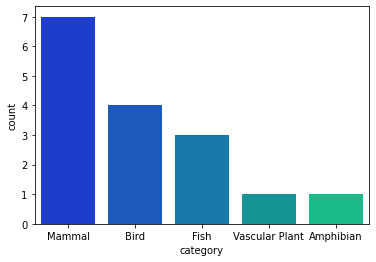

In [19]:
sns.countplot(x='category', data=endengered, palette='winter')
plt.show()

In [36]:
merge_data = pd.merge(obs, species)
merge_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
